### Rotational mass in Nordic system

#### Have a look at Nordic energy mix

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from constants import *
from cycler import cycler

CASE = "NOgrid"
#UK_NODES = ["GreatBrit."]
#NO_NODES = [f"NO{i}" for i in range(1,6)]

df_gen = pd.read_csv(f'Results/{CASE}/results_output_gen.csv')
df_nordic_gen = df_gen[df_gen["Node"].isin(NORDIC_NODES)].reset_index(drop=True)
df_nordic_gen

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh
0,Denmark,Coalexisting,2020-2025,0.000000,3165.000000,5.417105e-01,0.000000,15019.140844
1,Denmark,Coalexisting,2025-2030,0.000000,1947.692308,6.064726e-01,0.000000,10347.504196
2,Denmark,Coalexisting,2030-2035,0.000000,1308.605769,3.583533e-01,0.000000,4107.941876
3,Denmark,Coalexisting,2035-2040,0.000000,912.980769,3.573591e-02,0.000000,285.805486
4,Denmark,Coalexisting,2040-2045,0.000000,633.000000,3.376139e-08,0.000000,0.000187
...,...,...,...,...,...,...,...,...
1115,NO5,Nuclear,2035-2040,0.000118,0.000256,5.256120e-01,362.404442,0.001178
1116,NO5,Nuclear,2040-2045,0.000086,0.000342,4.562193e-01,179.789025,0.001366
1117,NO5,Nuclear,2045-2050,0.000310,0.000652,4.149056e-01,423.907973,0.002368
1118,NO5,Nuclear,2050-2055,0.000012,0.000664,5.190788e-01,9.791799,0.003019


Nordic (NO, SE, DK & FI) generation by source for case: NOgrid
['Windonshore', 'Hydroregulated', 'Windoffshoregrounded', 'Hydrorun-of-the-river', 'Nuclear', 'Bio', 'GasOCGT', 'GasCCGT', 'Waste', 'Solar', 'Wave', 'Coal', 'Bioexisting', 'Oilexisting', 'Gasexisting', 'Bio10cofiringCCS', 'Windoffshorefloating', 'Coalexisting']


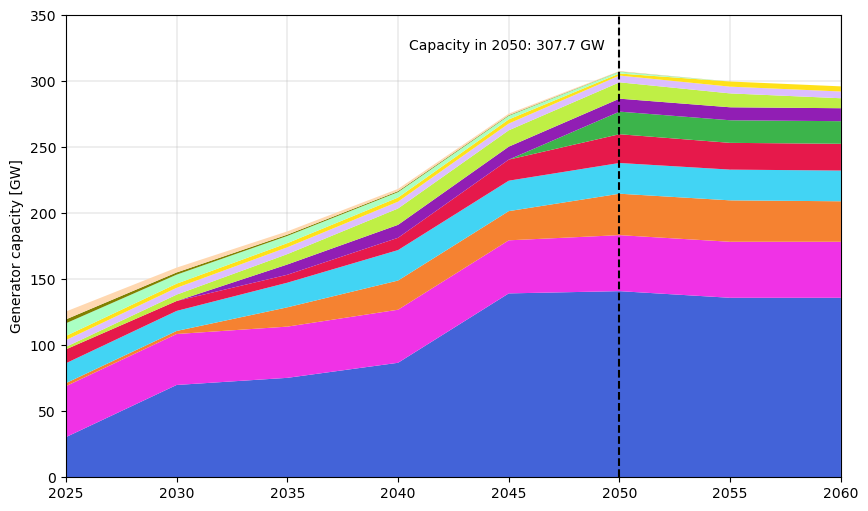

In [16]:
def plot_gen_by_source(case, _df):
    print(f"Nordic (NO, SE, DK & FI) generation by source for case: {case}")

    df_gen_source = _df.copy()
    df_gen_source["genInstalledCap_MW"] = df_gen_source.groupby(['GeneratorType', 'Period'])['genInstalledCap_MW'].transform('sum')
    df_gen_source = df_gen_source.drop_duplicates(("GeneratorType", "Period"), ignore_index=True)[["GeneratorType", "Period", "genInstalledCap_MW"]]

    periods = list(df_gen_source["Period"].unique())

    gen_source_sorted_by_cap = list(df_gen_source[df_gen_source["Period"] == "2055-2060"]\
                              .sort_values(by="genInstalledCap_MW", ascending=False)["GeneratorType"].values)
    
    gen_source_displayed = gen_source_sorted_by_cap

    installed_caps_gen = []
    for gen_source in gen_source_displayed:
        cap_by_period = []
        for period in periods:
            cap_by_period.append(df_gen_source[(df_gen_source["GeneratorType"] == gen_source) & (df_gen_source["Period"] == period)]["genInstalledCap_MW"].values[0])

        # Remove gen_source that have no capacity (1 MW since some threshold)
        if all(c < 1 for c in cap_by_period):
            gen_source_displayed.remove(gen_source)
        else:
            installed_caps_gen.append(cap_by_period)

    installed_caps_gen_GW = [[cap/1000 for cap in sublist] for sublist in installed_caps_gen]
    period_displayed_gen = [period.split("-")[1] for period in periods]

    print(gen_source_displayed)

    plt.rcParams.update({'font.size': 10})
    default_cycler = cycler(color=[TECH_TO_COLOR[tech] for tech in gen_source_displayed])
    plt.figure(figsize=(10,6))
    plt.rc('axes', axisbelow=True, prop_cycle=default_cycler)
    plt.grid(lw=0.3)
    plt.stackplot(period_displayed_gen, installed_caps_gen_GW, labels=gen_source_displayed)
    plt.ylabel('Generator capacity [GW]')
    #plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=5)
    plt.margins(x=0)

    y_max = 350
    plt.ylim(0, y_max)
    
    # Plot capacity 2050 
    cap_2050 = sum([cap[5] for cap in installed_caps_gen_GW]) # Total trans cap in GW

    # Align text based on height of peak
    # prod_by_periods = [sum([gen_cap[i] for gen_cap in installed_caps_gen_GW]) for i in range(8)]
    # max_prod = max(prod_by_periods)

    plt.axvline(x = 5, color = 'black', ls="--")
    plt.text(x=3.1, y=y_max*0.95, s=f"Capacity in 2050: {round(cap_2050, 1)} GW", verticalalignment='top')
    plt.savefig(f"SavedFigs/RotationalMass/Nordic-EnergyMix", bbox_inches='tight')
    plt.show()

plot_gen_by_source(CASE, df_nordic_gen)

Operational data set to calculate rotational mass

In [17]:
df_rotm = pd.read_csv(f"Results/{CASE}/results_output_Operational.csv")
df_rotm

,Node,Period,Scenario,Season,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Austria,2020-2025,scenario1,winter,1,6538.649674,-9934.890034,-6.538650e+03,0.0,0.0,...,-0.000235,0.000528,62352.000341,-0.000028,-2326.760273,5900.000350,-177.000010,4.438063e-08,58.949193,0.022063
1,Austria,2020-2025,scenario1,winter,2,6587.664615,-9839.652657,-6.587665e+03,0.0,0.0,...,-0.000212,260.463286,62091.537241,-0.000026,-613.538835,3716.560621,-111.496819,4.438203e-08,60.772369,0.021899
2,Austria,2020-2025,scenario1,winter,3,7901.099113,-9938.130187,-7.901099e+03,0.0,0.0,...,-0.000228,1816.437432,60275.100010,-0.000028,-504.736132,747.762889,-22.432887,4.438026e-08,60.772371,0.018259
3,Austria,2020-2025,scenario1,winter,4,8039.122848,-10509.670167,-8.039123e+03,0.0,0.0,...,-0.000233,2660.322856,57614.777358,-0.000028,-532.711316,353.542280,-10.606268,4.437893e-08,60.772371,0.017945
4,Austria,2020-2025,scenario1,winter,5,8096.165357,-10797.928132,-8.096165e+03,0.0,0.0,...,-0.000235,2934.477659,54680.299906,-0.000029,-503.611075,279.274666,-8.378240,4.437755e-08,60.772371,0.017819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192315,EnergyhubCentral,2055-2060,scenario3,peak2,716,0.000000,-0.000000,-5.544686e-07,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30000.000733,30927.835806,-927.835074,0.000000e+00,33.471111,0.000000
1192316,EnergyhubCentral,2055-2060,scenario3,peak2,717,0.000000,-0.000000,2.862423e-07,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30000.000732,30927.835807,-927.835074,0.000000e+00,33.471104,0.000000
1192317,EnergyhubCentral,2055-2060,scenario3,peak2,718,0.000000,-0.000000,-5.346230e-08,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30000.000732,30927.835807,-927.835074,0.000000e+00,33.471101,0.000000
1192318,EnergyhubCentral,2055-2060,scenario3,peak2,719,0.000000,-0.000000,-2.187163e-07,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,-30000.000733,30927.835807,-927.835074,0.000000e+00,33.471103,0.000000


Calculate mean values of scenarios 

In [18]:
df_rotm = df_rotm.groupby(["Node", "Period", "Hour"]).mean(numeric_only=True).reset_index()
df_rotm

,Node,Period,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,LigniteCCSadv_MW,Coalexisting_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Austria,2020-2025,1,6763.829412,-9483.377179,-6763.829412,0.0,0.0,0.0,112.499947,...,-0.000213,0.000711,62352.000138,-0.000026,-1748.640047,4606.378675,-138.191360,4.436468e-08,51.597424,0.075486
1,Austria,2020-2025,2,6693.726226,-9250.773997,-6693.726226,0.0,0.0,0.0,112.499683,...,-271.052930,86.821340,62482.021164,-54.210564,-1188.013646,4050.817533,-121.524526,4.436110e-08,50.379736,0.076704
2,Austria,2020-2025,3,7152.457883,-9552.050437,-7152.457883,0.0,0.0,0.0,112.499684,...,-212.705714,605.479383,62046.706374,-42.541121,-1160.077314,3264.841442,-97.945243,4.435912e-08,50.379736,0.074724
3,Austria,2020-2025,4,7105.150609,-9607.756654,-7105.150609,0.0,0.0,0.0,112.499684,...,-684.390568,886.774525,61707.444324,-136.878092,-691.955423,3084.719082,-92.541572,4.435754e-08,50.379736,0.075581
4,Austria,2020-2025,5,6987.353214,-9701.184300,-6987.353214,0.0,0.0,0.0,112.499683,...,-474.287989,978.159460,61108.715277,-94.857576,-562.578373,2858.286586,-85.748598,4.435615e-08,50.379736,0.077353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397435,VestavindF,2055-2060,716,0.002909,0.000000,-0.002909,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.052275,0.050889,-0.001527,3.529576e-06,346.346311,0.000000
397436,VestavindF,2055-2060,717,0.003099,0.000000,-0.003099,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.052471,0.050895,-0.001527,3.529408e-06,346.330643,0.000000
397437,VestavindF,2055-2060,718,0.003513,0.000000,-0.003513,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.052805,0.050814,-0.001524,3.529479e-06,346.505637,0.000000
397438,VestavindF,2055-2060,719,0.003763,0.000000,-0.003763,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.049844,0.047502,-0.001425,3.527984e-06,346.422376,0.000000


Filter by Nordic markets

In [19]:
df_rotm = df_rotm[df_rotm["Node"].isin(NORDIC_NODES)].reset_index(drop=True)
df_rotm

,Node,Period,Hour,AllGen_MW,Load_MW,Net_load_MW,Liginiteexisting_MW,Lignite_MW,LigniteCCSadv_MW,Coalexisting_MW,...,storCharge_MW,storDischarge_MW,storEnergyLevel_MWh,LossesChargeDischargeBleed_MW,FlowOut_MW,FlowIn_MW,LossesFlowIn_MW,LoadShed_MW,Price_EURperMWh,AvgCO2_kgCO2perMWh
0,Denmark,2020-2025,1,4911.502074,-5816.958454,-4911.502074,0.0,0.0,0.0,2146.091231,...,-0.000178,0.000288,0.000533,-0.000018,-1738.783930,2726.020824,-81.780625,4.433243e-08,39.633684,0.497780
1,Denmark,2020-2025,2,4347.004987,-5688.709421,-4347.004987,0.0,0.0,0.0,1582.499899,...,-0.000239,0.000202,0.000546,-0.000024,-1209.883220,2630.502774,-78.915083,4.431855e-08,37.562858,0.409525
2,Denmark,2020-2025,3,4246.905790,-5743.498792,-4246.905790,0.0,0.0,0.0,1582.482736,...,-0.000268,0.000186,0.000602,-0.000027,-1205.039482,2785.188213,-83.555646,4.431676e-08,37.305303,0.410153
3,Denmark,2020-2025,4,4116.597440,-5678.394031,-4116.597440,0.0,0.0,0.0,1582.483439,...,-0.000258,0.000187,0.000647,-0.000026,-1198.882782,2846.061283,-85.381838,4.431599e-08,37.305301,0.410253
4,Denmark,2020-2025,5,4164.039468,-5568.497960,-4164.039468,0.0,0.0,0.0,1582.499868,...,-0.000247,0.000191,0.000679,-0.000025,-1156.404052,2640.064537,-79.201936,4.431627e-08,37.558440,0.387052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46075,Sweden,2055-2060,716,30990.460652,-31781.332665,-30990.460652,0.0,0.0,0.0,0.000000,...,-43.261795,0.005141,1053.123216,-8.652145,-6252.357273,7305.655605,-219.169668,3.542418e-06,358.665289,0.039101
46076,Sweden,2055-2060,717,30872.321908,-31707.395078,-30872.321908,0.0,0.0,0.0,0.000000,...,-14.738742,0.005369,1064.909052,-2.947536,-6139.692766,7205.669387,-216.170082,3.542357e-06,358.684595,0.038965
46077,Sweden,2055-2060,718,30878.426914,-31878.338780,-30878.426913,0.0,0.0,0.0,0.000000,...,-14.293560,0.005379,1076.338734,-2.858500,-5725.104676,6947.736825,-208.432105,3.542259e-06,358.684611,0.038313
46078,Sweden,2055-2060,719,32073.170870,-32666.217714,-32073.170870,0.0,0.0,0.0,0.000000,...,-14.105441,0.005361,1087.617940,-2.820874,-6323.512837,7145.010060,-214.350302,3.542097e-06,358.684624,0.035891


Sum by rotational mass tech

* Inertia constants from https://eepublicdownloads.entsoe.eu/clean-documents/Publications/SOC/Nordic/Nordic_report_Future_System_Inertia.pdf (p. 52)
* Formula from https://www.statnett.no/globalassets/for-aktorer-i-kraftsystemet/utvikling-av-kraftsystemet/nordisk-frekvensstabilitet/future-system-inertia-phase-2.pdf (p.16)
    * Low inertia situations in Nordic system defined as <120 GWs (p. 8)
* Synthetic inertia constant for wind assumed 5s based on https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7285969 (p. 4)

In [20]:
SYNTHETHIC_INERTIA = False

INERTIA_BY_TECH = {
    'Windonshore_MW': 5 if SYNTHETHIC_INERTIA else 0, # Above low inertia situation for all except 1 hour if >3s
    'Nuclear_MW': 6.3,
    'Hydroregulated_MW': 3,
    'Hydrorun-of-the-river_MW': 1,
    'Liginiteexisting_MW': 4,
    'Lignite_MW': 4,
    'LigniteCCSadv_MW': 4,
    'Coalexisting_MW': 4,
    'Coal_MW': 4,
    'CoalCCSadv_MW': 4,
    'Gasexisting_MW': 4,
    'GasOCGT_MW': 4,
    'GasCCGT_MW': 4,
    'GasCCSadv_MW': 4,
    'Oilexisting_MW': 4,
    'Bioexisting_MW': 4,
    'Bio10cofiring_MW': 4,
    'Geo_MW': 4,
    'Bio_MW': 4,
    'Bio10cofiringCCS_MW': 4,
    'LigniteCCSsup_MW': 4,
    'CoalCCS_MW': 4,
    'GasCCS_MW': 4,
    'Waste_MW': 4,
}

Rotational mass in Nordic system 2020-2060 (hourly resolution)


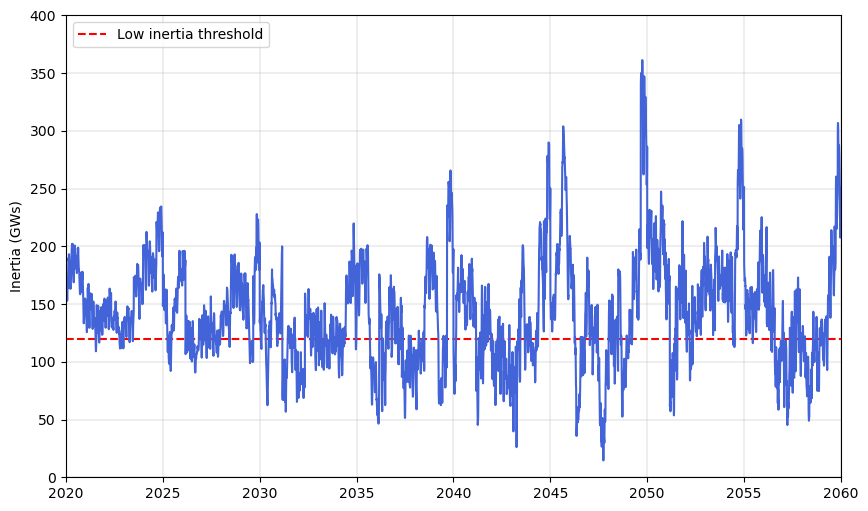

Average imbalance cost per year: 4803.4 MNOK
Average imbalance cost per year extreme: 103969.4 MNOK

Average prod per year: 675.8 TWh
Additional cost per kWh: 0.007 NOK/kWh
Additional cost per kWh extreme: 0.154 NOK/kWh

Additional imbalance cost per GW wind: 39.7 MNOK
Additional imbalance cost per GW wind extreme: 859.3 MNOK


In [21]:
def calc_rot_mass_GWs(df_row):
    rot_mass_MWs = 0
    for tech, inertia_const in INERTIA_BY_TECH.items():
        rot_mass_MWs += df_row[tech] * inertia_const
    return rot_mass_MWs / 1000

print("Rotational mass in Nordic system 2020-2060 (hourly resolution)")

df_rotm["Rotational mass GWs"] = df_rotm.apply(lambda row: calc_rot_mass_GWs(row), axis=1)

rot_mass_GW_by_hour = list(df_rotm.groupby(by=["Period", "Hour"])["Rotational mass GWs"].sum())
hours = [i+1 for i in range(len(rot_mass_GW_by_hour))]

fig = plt.figure(figsize=(10,6))
plt.rc('axes', axisbelow=True)
plt.grid(lw=0.3)

# Should be above 120 GWs (from master thesis ^)
plt.axhline(y=120, color='r', linestyle='--')

plt.plot(hours, rot_mass_GW_by_hour, color="#4363d8")
plt.ylabel("Inertia (GWs)")
plt.margins(x=0)
plt.ylim(0, 400)

# Change ticks (720 hrs per year)
plt.xticks(ticks=[720*i for i in range(9)], labels=[2020+5*i for i in range(9)])
plt.legend(["Low inertia threshold"], handlelength=2, loc="upper left")
plt.savefig(f"SavedFigs/RotationalMass/Nordic-RotationalMass", bbox_inches='tight')
plt.show()

# Cost based on "The existing Nordic regulating power market (2011)" p.8
cost_per_kWh_NOK = 0.066 * 1.05
cost_per_kWh_NOK_extreme = 1500 / 1000 # More extreme scenario 1.5 NOK/kWh
total_kWh_below_threshold = sum([(120-rot_mass_GW)*10**6 for rot_mass_GW in rot_mass_GW_by_hour if rot_mass_GW < 120])

# Scale hours to obtain true number of hours in a year
SCALING_FACTOR = (365*24) * 5 / 720

# Calculate cost of imbalances
total_cost_MNOK = round(total_kWh_below_threshold * cost_per_kWh_NOK * SCALING_FACTOR / 10**6, 1)
total_cost_MNOK_extreme = round(total_kWh_below_threshold * cost_per_kWh_NOK_extreme * SCALING_FACTOR / 10**6, 1)

avg_cost_per_year = round(total_cost_MNOK / 40, 1)
avg_cost_per_year_extreme = round(total_cost_MNOK_extreme / 40, 1)
print(f"Average imbalance cost per year: {avg_cost_per_year} MNOK")
print(f"Average imbalance cost per year extreme: {avg_cost_per_year_extreme} MNOK\n")


# Calculate average additional cost per kWh of production
avg_TWh_prod_per_year = 675.8 # Calculated separately in XLS "231209 Annual production GWh base case"
print(f"Average prod per year: {avg_TWh_prod_per_year} TWh")

additional_cost_per_kWh_NOK = round((avg_cost_per_year * 10**6) / (avg_TWh_prod_per_year * 10**9), 3)
additional_cost_per_kWh_NOK_extreme = round((avg_cost_per_year_extreme * 10**6) / (avg_TWh_prod_per_year * 10**9), 3)

print(f"Additional cost per kWh: {additional_cost_per_kWh_NOK} NOK/kWh")
print(f"Additional cost per kWh extreme: {additional_cost_per_kWh_NOK_extreme} NOK/kWh\n")


# Calculate cost per GW wind
GW_increase_Nordic = 144-23 #From initial to 2050
increase_per_GW_MNOK = round(avg_cost_per_year / GW_increase_Nordic, 1)
increase_per_GW_MNOK_extreme = round(avg_cost_per_year_extreme / GW_increase_Nordic, 1)

print(f"Additional imbalance cost per GW wind: {increase_per_GW_MNOK} MNOK")
print(f"Additional imbalance cost per GW wind extreme: {increase_per_GW_MNOK_extreme} MNOK")